# Brief projet prediction

## Import des librairies nécessaires 

In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
import numpy as np
from pylab import *
import matplotlib
from matplotlib import *
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import svm
import sklearn
from sklearn.model_selection import train_test_split

##  Etape 3 : Import des données afin de les mettre dans un DataFrame

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## Etape 4 : Analyses exploratoires

In [4]:
df_year = df[['LotArea','OverallQual','TotalBsmtSF','GrLivArea','SalePrice','YrSold']].groupby('YrSold').mean().reset_index()

#### Je visualise la moyenne des prix en fonction des années afin de déterminer si il y aurai des facteurs exterieurs qui pourraient altérer nos resultats (ex: Subprimes de 2007-2008)

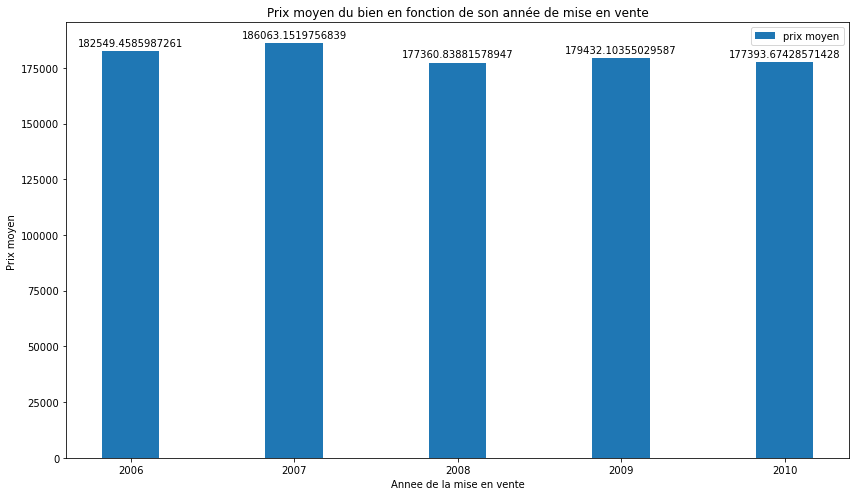

In [5]:
labels = df_year['YrSold']
taux_de_reussite_pourcentage_G = df_year['SalePrice']


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars


fig, ax = plt.subplots(figsize=(12, 7))
rects1 = ax.bar(x , taux_de_reussite_pourcentage_G, width, label='prix moyen')


ax.set_ylabel('Prix moyen ')
ax.set_xlabel('Annee de la mise en vente')
ax.set_title('Prix moyen du bien en fonction de son année de mise en vente')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)


fig.tight_layout()

plt.show()

#### Le temps n'a pas l'air de trop influencer les prix 

In [6]:
df_select = df[['LotArea','OverallQual','TotalBsmtSF','GrLivArea','SaleType','SalePrice','LotArea','YrSold']]
df_select=df_select.dropna(how = 'any')
df_select

,LotArea,OverallQual,TotalBsmtSF,GrLivArea,SaleType,SalePrice,LotArea,YrSold
0,8450,7,856,1710,WD,208500,8450,2008
1,9600,6,1262,1262,WD,181500,9600,2007
2,11250,7,920,1786,WD,223500,11250,2008
3,9550,7,756,1717,WD,140000,9550,2006
4,14260,8,1145,2198,WD,250000,14260,2008
...,...,...,...,...,...,...,...,...
1455,7917,6,953,1647,WD,175000,7917,2007
1456,13175,6,1542,2073,WD,210000,13175,2010
1457,9042,7,1152,2340,WD,266500,9042,2010
1458,9717,5,1078,1078,WD,142125,9717,2010


In [7]:
df_select.describe()

,LotArea,OverallQual,TotalBsmtSF,GrLivArea,SalePrice,LotArea,YrSold
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,6.099315,1057.429452,1515.463699,180921.195890,10516.828082,2007.815753
std,9981.264932,1.382997,438.705324,525.480383,79442.502883,9981.264932,1.328095
min,1300.000000,1.000000,0.000000,334.000000,34900.000000,1300.000000,2006.000000
25%,7553.500000,5.000000,795.750000,1129.500000,129975.000000,7553.500000,2007.000000
50%,9478.500000,6.000000,991.500000,1464.000000,163000.000000,9478.500000,2008.000000
75%,11601.500000,7.000000,1298.250000,1776.750000,214000.000000,11601.500000,2009.000000
max,215245.000000,10.000000,6110.000000,5642.000000,755000.000000,215245.000000,2010.000000


#### On peut observer un prix moyen de 180 000 dollars, un prix minimum de 34900 dollars et maximum de 755 000 dollars ce qui ne paraît pas du tout absurde. De plus la mediane et la moyenne se rapprochent ce qui s'explique par peu de valeurs extrêmes et des valeurs extrêmes pas si extrêmes.

In [65]:
df_pair = df_select[['OverallQual','TotalBsmtSF','GrLivArea','SalePrice']]
df_pair

,OverallQual,TotalBsmtSF,GrLivArea,SalePrice
0,7,856,1710,208500
1,6,1262,1262,181500
2,7,920,1786,223500
3,7,756,1717,140000
4,8,1145,2198,250000
...,...,...,...,...
1455,6,953,1647,175000
1456,6,1542,2073,210000
1457,7,1152,2340,266500
1458,5,1078,1078,142125


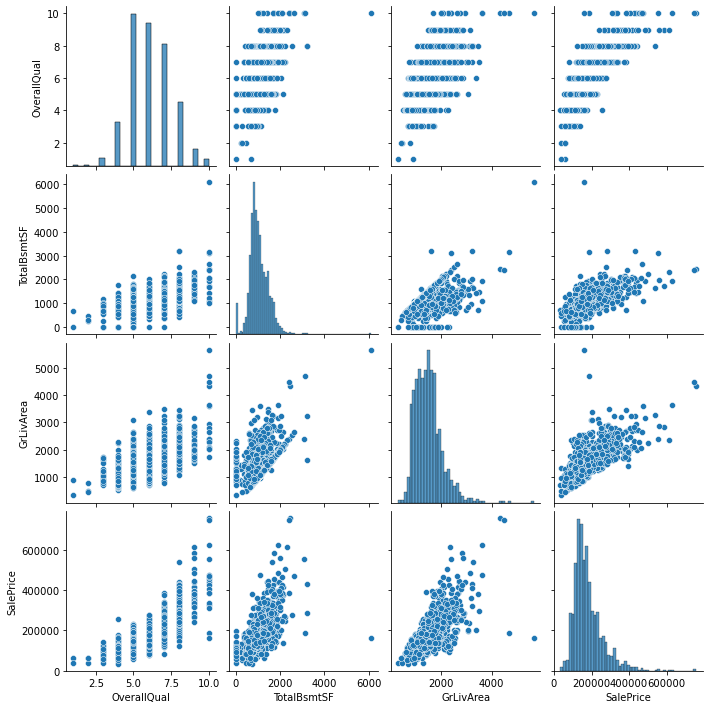

In [66]:
sns.pairplot(df_pair)

#### On peut remarquer grâce à ce style de graphiques les différentes features pouvant être corrélés entre elles. On voit nottamment que la colonne GrlivArea semble suivre une linéarité croissante dans la dispersion de ses points avec SalePrice ce qui nous indique une possible corrélation.

#### Je selectionne donc la feature GrLivArea 

In [9]:
df_grliv = df_select[['GrLivArea','OverallQual','SaleType','TotalBsmtSF','LotArea','SalePrice']]

In [10]:
df_grliv


,GrLivArea,OverallQual,SaleType,TotalBsmtSF,LotArea,LotArea,SalePrice
0,1710,7,WD,856,8450,8450,208500
1,1262,6,WD,1262,9600,9600,181500
2,1786,7,WD,920,11250,11250,223500
3,1717,7,WD,756,9550,9550,140000
4,2198,8,WD,1145,14260,14260,250000
...,...,...,...,...,...,...,...
1455,1647,6,WD,953,7917,7917,175000
1456,2073,6,WD,1542,13175,13175,210000
1457,2340,7,WD,1152,9042,9042,266500
1458,1078,5,WD,1078,9717,9717,142125


## Etape 5 : Regression linéaire

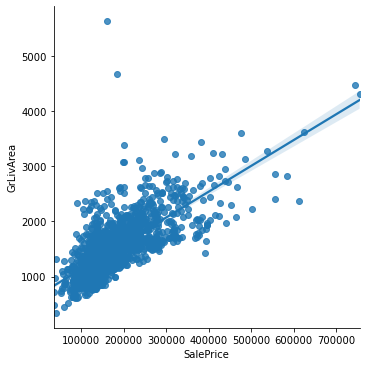

In [11]:
sns.lmplot(data= df_grliv, x= 'SalePrice', y='GrLivArea')

#### On voit que la distribution de nos points semble se rapprocher de la droite, on peut donc déjà en déduire un r-carré assez significatif

In [12]:
df_select.corr()

,LotArea,OverallQual,TotalBsmtSF,GrLivArea,SalePrice,LotArea,YrSold
LotArea,1.000000,0.105806,0.260833,0.263116,0.263843,1.000000,-0.014261
OverallQual,0.105806,1.000000,0.537808,0.593007,0.790982,0.105806,-0.027347
TotalBsmtSF,0.260833,0.537808,1.000000,0.454868,0.613581,0.260833,-0.014969
GrLivArea,0.263116,0.593007,0.454868,1.000000,0.708624,0.263116,-0.036526
SalePrice,0.263843,0.790982,0.613581,0.708624,1.000000,0.263843,-0.028923
LotArea,1.000000,0.105806,0.260833,0.263116,0.263843,1.000000,-0.014261
YrSold,-0.014261,-0.027347,-0.014969,-0.036526,-0.028923,-0.014261,1.000000


#### J analyse les différents scores de corrélations entre les plusieurs colonnes que j'avais selectionées grâce au pairplot

#### Je log mes données afin d'apporter une meilleure précision

In [14]:
df2 = log(df_grliv[['SalePrice', 'GrLivArea']])

In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SalePrice  1460 non-null   float64
 1   GrLivArea  1460 non-null   float64
dtypes: float64(2)
memory usage: 34.2 KB


## Etape 6 : Faire une regression lineaire avec Stats model et interpreter les résultats

In [16]:
mod = ols(formula='SalePrice ~  GrLivArea ', data=df2)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     1666.
Date:                Tue, 25 May 2021   Prob (F-statistic):          1.60e-243
Time:                        11:14:19   Log-Likelihood:                -175.10
No. Observations:                1460   AIC:                             354.2
Df Residuals:                    1458   BIC:                             364.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.6681      0.156     36.360      0.0

#### Nous pouvons remarquer que, en effet, notre r-carré est plutôt significatif, notre regression peut donc expliquer (dans notre cas) environ 50 % de la distribution. Pour appuyer sur la significativité on peut évaluer notre p-value qui doit être la plus petite possible (5% maximum) : en effet elle est bien infèrieur à 5%. 

In [17]:
ypred = res.predict(df2['GrLivArea'])

#### Prédiction sur notre colonne "SalePrice" afin de pouvoir comparer les valeurs prédictives des valeurs réelles et faire la différence entre elles pour pouvoir récupérer les residus 

In [18]:
ypred

0       12.178384
1       11.912704
2       12.216413
3       12.181957
4       12.397940
          ...    
1455    12.145556
1456    12.346735
1457    12.452689
1458    11.774886
1459    11.908536
Length: 1460, dtype: float64

#### Voici nos valeurs prédites

In [19]:
diff = ypred - df2['SalePrice']

#### Différence entre les valeurs prédites et réelles

In [20]:
diff

0      -0.069310
1      -0.196307
2      -0.100754
3       0.332559
4      -0.031276
          ...   
1455    0.073014
1456    0.091872
1457   -0.040441
1458   -0.089577
1459    0.006953
Length: 1460, dtype: float64

#### On a donc içi tous nos résidus

<AxesSubplot:ylabel='Density'>

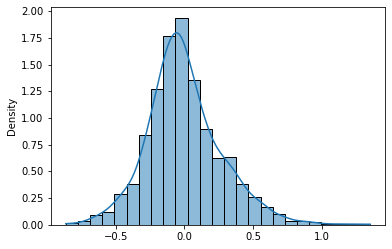

In [21]:
sns.histplot(diff, bins=25, stat ='density', kde =True)

#### Ils semblents suivre une loi normale ce qui est une bonne nouvelle

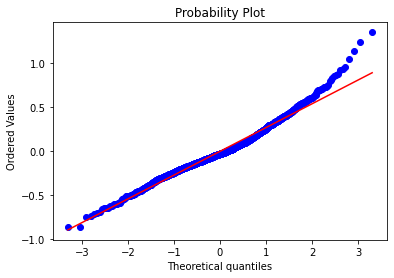

In [22]:
import scipy.stats as stats

stats.probplot(diff, dist="norm", plot=pylab)
pylab.show()

#### Ce graphique permet d'affirmer qu'ils suivent bien une loi normale 

In [23]:
mod = ols(formula='SalePrice ~  GrLivArea', data=df2)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     1666.
Date:                Tue, 25 May 2021   Prob (F-statistic):          1.60e-243
Time:                        11:14:36   Log-Likelihood:                -175.10
No. Observations:                1460   AIC:                             354.2
Df Residuals:                    1458   BIC:                             364.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.6681      0.156     36.360      0.0

## Etape 8 (Objectif) : Réaliser une prediction avec statsmodel et sklearn.

In [24]:
df2

,SalePrice,GrLivArea
0,12.247694,7.444249
1,12.109011,7.140453
2,12.317167,7.487734
3,11.849398,7.448334
4,12.429216,7.695303
...,...,...
1455,12.072541,7.406711
1456,12.254863,7.636752
1457,12.493130,7.757906
1458,11.864462,6.982863


#### Nous commençons par le faire avec stats model car ce sera bien de pouvoirs comparer les prédictions entre ces deux librairies différentes

In [25]:
zpred = pd.DataFrame({'GrLivArea':[log(2500)]})

#### Création d'un Dataframe contenant notre valeurs qui servira à prédire le prix 

In [26]:
prediction = res.predict(zpred)

In [27]:
exp(prediction)

0    271177.847813
dtype: float64

#### Içi pour une air de 2500 foot squared on peut prédire un prix de 271 177 dollars

#### Faisons maintenant la même chose avec ScikitLearn

In [28]:
y = df2['SalePrice']
X= df2[['GrLivArea']]
reg = LinearRegression().fit(X, y)
reg.score(X, y)

0.5332721476985478

#### Notre score est le même que celui de stats model 

In [29]:
reg.coef_

array([0.87453543])

#### Le coef également 

In [30]:
dpred = exp(reg.predict([[log(1262)]]))
dpred1 = dpred[0].round(2)
dpred1

149149.42

#### Notre prédiction est également la même que sur statsmodel

#### Voici un petit programme predictif qui suit notre modele du vu avant

In [31]:
def prediction_immobilier():
    
    user = input('Entrez une air foot squared pour connaitre un prix : ')    
    user1 = float(user)
    
    dpred = exp(reg.predict([[log(user1)]]))
    dpred1 = dpred[0].round(2)
    
    print(f'Le prix est de {dpred1} dollars')

prediction_immobilier()    

Entrez une air foot squared pour connaitre un prix : 2500
Le prix est de 271177.85 dollars


## Etape 9 Optionnel level 1 : Separer les données d'entrainement et données de test (test.csv) 

#### Attribution des de deux colonnes aux variables X et y .

In [32]:
 X, y = df2[['GrLivArea']],df2['SalePrice']

#### Séparation des données de nos colonnes selectionnées en données test et entrainement

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=41)

In [34]:
X_train

,GrLivArea
726,7.426549
172,7.477038
998,6.981935
849,7.525640
777,6.795706
...,...
407,7.426549
243,7.104144
321,7.811163
1104,7.171657


In [35]:
X_test

,GrLivArea
335,7.487734
1074,7.122867
933,7.313220
982,7.143618
921,7.696213
...,...
329,7.083388
1347,7.482119
1398,7.551712
1355,7.560080


In [36]:
y_train = pd.DataFrame(y_train)
y_train

,SalePrice
726,12.310433
172,12.384219
998,11.418615
849,12.138864
777,11.867097
...,...
407,12.083905
243,11.695247
321,12.777052
1104,11.571194


In [37]:
X_train

,GrLivArea
726,7.426549
172,7.477038
998,6.981935
849,7.525640
777,6.795706
...,...
407,7.426549
243,7.104144
321,7.811163
1104,7.171657


In [38]:
y_test = pd.DataFrame(y_test)
y_test

,SalePrice
335,12.341259
1074,12.175613
933,12.154779
982,11.982273
921,11.890677
...,...
329,11.264464
1347,12.554837
1398,11.835009
1355,12.043554


## Etape 10 : Revenir à l'étape 7 et faire un .fit(X_train) avec les données d'entrainement et un .score(X_test) sur les données de test.

#### On crée notre modele sur nos données d'entrainement

In [39]:
reg = LinearRegression().fit(X_train, y_train)

#### On affiche le score de nos données test avec le modele entrainé sur train 

In [40]:
reg.score(X_test, y_test)

0.5279392125286111

## Etape 11 : Comparer la difference de score entre l'entrainement avec de la fuite de donnée ( .fit(X_train, et un .score(y_train) ) et sans fuite de donnée (.fit(X_train) .score(y_test) interpreter.

In [41]:
reg.score(X_train, y_train)

0.5351308671224236

In [42]:
reg.coef_

array([[0.88058502]])

In [43]:
reg.intercept_

array([5.62403785])

In [44]:
df2

,SalePrice,GrLivArea
0,12.247694,7.444249
1,12.109011,7.140453
2,12.317167,7.487734
3,11.849398,7.448334
4,12.429216,7.695303
...,...,...
1455,12.072541,7.406711
1456,12.254863,7.636752
1457,12.493130,7.757906
1458,11.864462,6.982863


## Etape 12 Optionnel Level 2 : Ajouter une feature supplémentaire (qui vous semble pertinante) à votre model pour essayer d'ameliorer les performances de votre model

In [45]:
mod = ols(formula='SalePrice ~ OverallQual + GrLivArea + TotalBsmtSF + LotArea' , data=df_grliv)
pres = mod.fit()
print(pres.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     1080.
Date:                Tue, 25 May 2021   Prob (F-statistic):               0.00
Time:                        11:17:11   Log-Likelihood:                -17537.
No. Observations:                1460   AIC:                         3.508e+04
Df Residuals:                    1455   BIC:                         3.511e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.071e+05   4772.927    -22.448      

#### Notre r-carré est plus élevé

In [46]:
wpred = pres.predict(df_grliv[['OverallQual','GrLivArea','TotalBsmtSF','LotArea']])

In [47]:
wpred

0       207904.260596
1       172500.757512
2       215373.336113
3       205644.244978
4       272712.074151
            ...      
1455    178970.010970
1456    221589.656291
1457    247196.458645
1458    129110.240249
1459    143366.871258
Length: 1460, dtype: float64

In [48]:
diffe = wpred - df_grliv['SalePrice']

<AxesSubplot:ylabel='Density'>

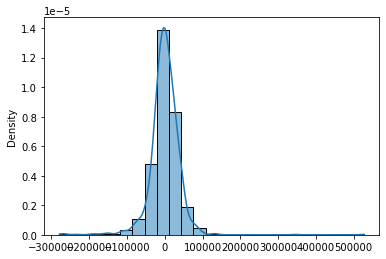

In [49]:
sns.histplot(diffe, bins=25, stat ='density', kde =True)

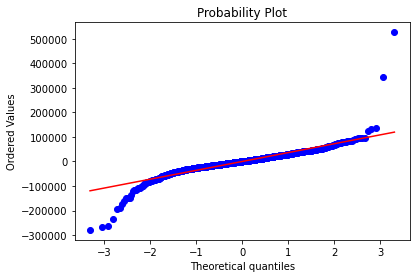

In [50]:
stats.probplot(diffe, dist="norm", plot=pylab)
pylab.show()